In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('House_pricing_india.csv')
df.head(10)

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,Bangalore,JP Nagar Phase 1,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Bangalore,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Bangalore,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Bangalore,Doddanekundi,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Bangalore,Kengeri,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
5,6797000,1220,Bangalore,Horamavu,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
6,20000000,2502,Bangalore,Thanisandra,4,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
7,7105000,1438,Bangalore,Ramamurthy Nagar,3,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
8,8405000,1405,Bangalore,Whitefield Hope Farm Junction,3,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
9,3506000,660,Bangalore,Electronic City Phase 1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(32963, 41)

In [4]:
#df.drop('City',axis='columns',inplace=True)

In [5]:
new_value = float("Nan")
df.replace(to_replace =9 ,value = new_value, inplace= True)
df = df.dropna()

In [6]:
df.shape

(10093, 41)

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df.shape

(8226, 41)

In [8]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [9]:
df[~df.Area.apply(is_float)]

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator


In [10]:
dfd=df.copy()

In [11]:
dfd.Location=dfd.Location.apply(lambda x:x.strip())

In [12]:
location_stat=dfd.groupby('Location')['Location'].agg('count').sort_values(ascending=False)

In [13]:
location_stat

Location
Kharghar               281
Dwarka Mor             222
Uttam Nagar            216
Kondapur               124
Kukatpally             116
                      ... 
Mannivakkam              1
Majiwada                 1
Mailardevpally           1
Mahatma Gandhi Road      1
west venkatapuram        1
Name: Location, Length: 849, dtype: int64

In [14]:
loc_stat_less_than15=location_stat[location_stat<15]

In [15]:
loc_stat_less_than15

Location
Velachery              14
Jasola                 14
Nungambakkam           14
Sector 13 Rohini       14
Kovur                  14
                       ..
Mannivakkam             1
Majiwada                1
Mailardevpally          1
Mahatma Gandhi Road     1
west venkatapuram       1
Name: Location, Length: 689, dtype: int64

In [16]:
len(loc_stat_less_than15)

689

In [17]:
dfd.Location=dfd.Location.apply(lambda x:'other' if x in loc_stat_less_than15 else x)
dfd.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,Bangalore,other,4.0,0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7888000,1045,Bangalore,other,2.0,0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4866000,1179,Bangalore,Kannur on Thanisandra Main Road,2.0,0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8358000,1675,Bangalore,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6845000,1670,Bangalore,other,3.0,0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dfd[dfd.Area/dfd['No. of Bedrooms']<300].head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
1553,4100000,1055,Bangalore,Bommasandra,4.0,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6533,2259000,572,Chennai,Perungalathur,2.0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6624,2500000,570,Chennai,Thiruverkadu,2.0,0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6851,6600000,697,Chennai,other,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6862,2982000,590,Chennai,Kolapakkam,2.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
len(dfd[dfd.Area/dfd['No. of Bedrooms']<300])

395

In [20]:
dfd.shape

(8226, 41)

In [21]:
dfd2=dfd[~(dfd.Area/dfd['No. of Bedrooms']<300)]
dfd2.shape

(7831, 41)

In [22]:
dfd2.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,7.831000e+03,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,...,7831.000000,7831.000000,7831.00000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000
mean,1.109772e+07,1410.353339,2.478100,0.346061,0.174946,0.554080,0.444388,0.378879,0.360490,0.389861,...,0.724812,0.098710,0.30341,0.058230,0.023624,0.062444,0.062189,0.061295,0.023879,0.060656
std,1.372498e+07,728.368380,0.776901,0.475743,0.379945,0.497098,0.496929,0.485139,0.480173,0.487750,...,0.446638,0.298292,0.45976,0.234193,0.151885,0.241976,0.241513,0.239886,0.152683,0.238714
min,2.000000e+06,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.800000e+06,1000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.500000e+06,1256.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.300000e+07,1655.500000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000e+08,9900.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
dfd2.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,Bangalore,other,4.0,0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7888000,1045,Bangalore,other,2.0,0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4866000,1179,Bangalore,Kannur on Thanisandra Main Road,2.0,0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8358000,1675,Bangalore,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6845000,1670,Bangalore,other,3.0,0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
dfd2['price_per_sqft']=dfd2.Price/dfd2.Area

C:\Users\19056\AppData\Local\Temp/ipykernel_17472/3580336675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd2['price_per_sqft']=dfd2.Price/dfd2.Area


In [25]:
dfd2.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,price_per_sqft
0,30000000,3340,Bangalore,other,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8982.035928
1,7888000,1045,Bangalore,other,2.0,0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7548.325359
2,4866000,1179,Bangalore,Kannur on Thanisandra Main Road,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4127.226463
3,8358000,1675,Bangalore,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4989.850746
4,6845000,1670,Bangalore,other,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4098.802395


In [26]:
dfd2.price_per_sqft.describe()

count      7831.000000
mean       7321.025696
std        5132.477703
min        2000.000000
25%        4666.666667
50%        5891.594658
75%        8374.491870
max      109950.522265
Name: price_per_sqft, dtype: float64

In [27]:
import numpy as np
def remove_price_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [28]:
dfd3=remove_price_outliers(dfd2)

In [29]:
dfd3.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,price_per_sqft
0,15500000,1200,Delhi,Alaknanda,3.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12916.666667
1,15600000,1300,Delhi,Alaknanda,2.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12000.000000
2,19000000,1450,Delhi,Alaknanda,3.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13103.448276
3,19000000,1450,Delhi,Alaknanda,3.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13103.448276
4,15000000,1200,Delhi,Alaknanda,2.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12500.000000


In [30]:
dfd3.shape

(6017, 42)

In [31]:
dfd3['No. of Bedrooms'].unique()

array([3., 2., 1., 4., 5., 6.])

In [32]:
bedroom_stat=dfd3.groupby('No. of Bedrooms')['No. of Bedrooms'].agg('count').sort_values(ascending=False)

In [33]:
bedroom_stat

No. of Bedrooms
2.0    2572
3.0    2519
1.0     559
4.0     335
5.0      29
6.0       3
Name: No. of Bedrooms, dtype: int64

In [34]:
from matplotlib.pyplot import figure
def bedroom_visual(df,Location):
    bed2=df[(df.Location==Location) & (df['No. of Bedrooms']==2)]
    bed3=df[(df.Location==Location) & (df['No. of Bedrooms']==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bed2.Area,bed2.Price,color='Red',marker='*',label='2 Bedroom')
    plt.scatter(bed3.Area,bed3.Price,color='Green',marker='.',label='3 Bedroom')
    plt.xlabel('Total Area')
    plt.ylabel('Price')
    plt.title(Location)

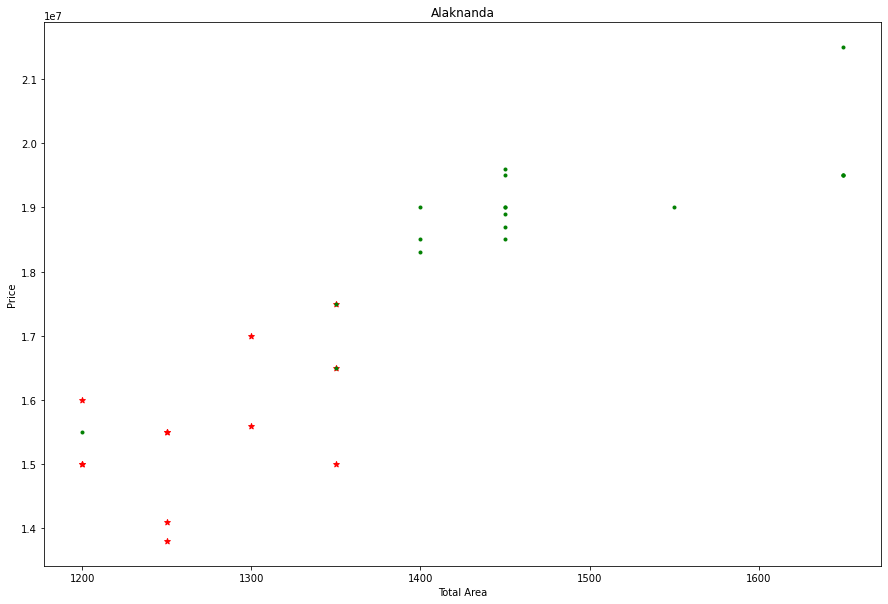

In [35]:
bedroom_visual(dfd3,'Alaknanda')

In [36]:
def remove_bedroom_outlier(df):
    exclude_indices=np.array([])
    for Location,Location_df in df.groupby('Location'):
        bedroom_stats={}
        for bed,bed_df in Location_df.groupby('No. of Bedrooms'):
            bedroom_stats[bed]={
                'mean':np.mean(bed_df.price_per_sqft),
                'std':np.std(bed_df.price_per_sqft),
                'count':bed_df.shape[0]
            }
            
        for bed,bed_df in Location_df.groupby('No. of Bedrooms'):
            stats=bedroom_stats.get(bed-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bed_df[bed_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [37]:
dfd4=remove_bedroom_outlier(dfd3)
dfd4.shape

(4218, 42)

Text(0, 0.5, 'Count')

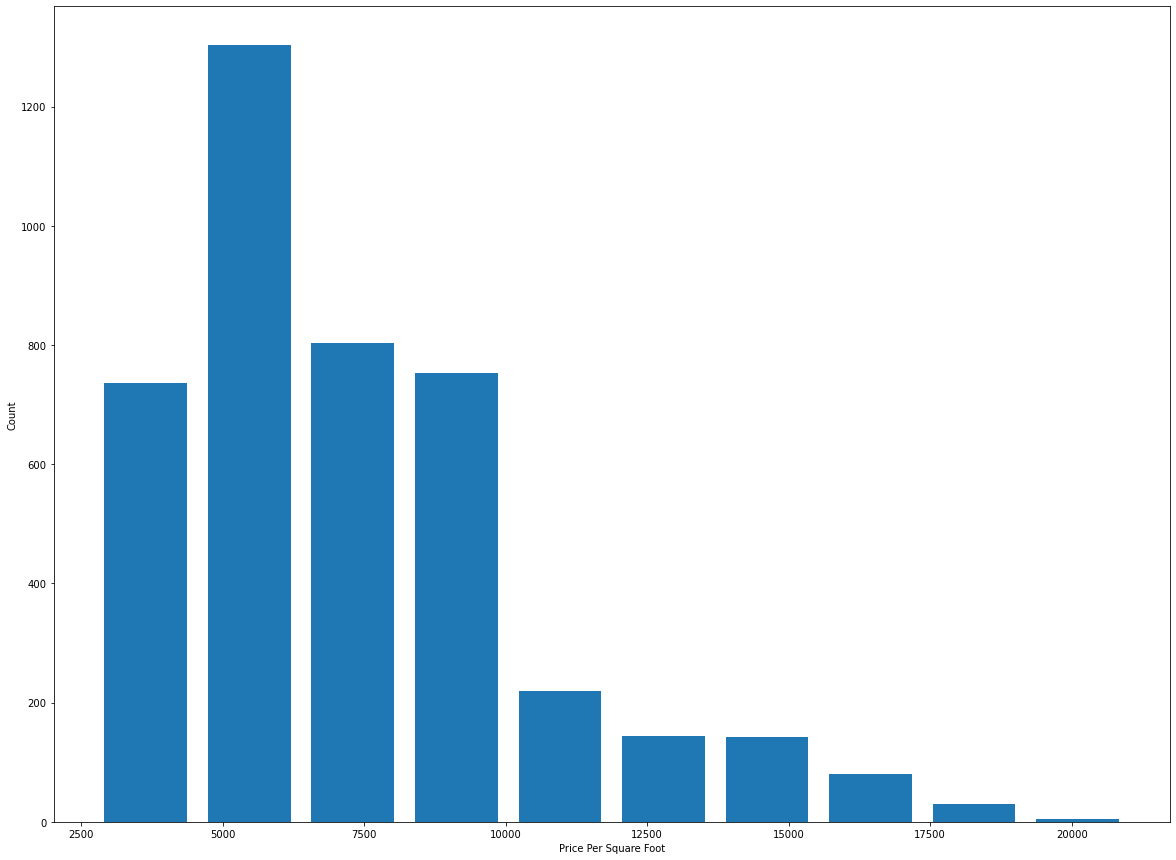

In [38]:
import matplotlib
plt.rcParams['figure.figsize']=(20,15)
plt.hist(dfd4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Foot")
plt.ylabel("Count")

In [39]:
dfd4.head(20)

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,price_per_sqft
0,15500000,1200,Delhi,Alaknanda,3.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12916.666667
1,15600000,1300,Delhi,Alaknanda,2.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12000.000000
2,19000000,1450,Delhi,Alaknanda,3.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13103.448276
3,19000000,1450,Delhi,Alaknanda,3.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13103.448276
4,15000000,1200,Delhi,Alaknanda,2.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12500.000000
5,15500000,1250,Delhi,Alaknanda,2.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12400.000000
6,18700000,1450,Delhi,Alaknanda,3.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12896.551724
7,18300000,1400,Delhi,Alaknanda,3.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13071.428571
9,15000000,1350,Delhi,Alaknanda,2.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111.111111
10,18500000,1450,Delhi,Alaknanda,3.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12758.620690


In [40]:
dfd4.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,price_per_sqft
count,4.218000e+03,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,...,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000
mean,1.047118e+07,1368.334282,2.371977,0.368421,0.193694,0.561404,0.431721,0.382646,0.367947,0.404457,...,0.092461,0.313419,0.050498,0.022523,0.062826,0.058796,0.056662,0.018966,0.056662,7282.877605
std,8.223903e+06,710.309385,0.802735,0.482434,0.395239,0.496274,0.495375,0.486091,0.482304,0.490845,...,0.289710,0.463938,0.218996,0.148393,0.242678,0.235270,0.231223,0.136422,0.231223,3156.644413
min,2.000000e+06,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2727.272727
25%,4.819500e+06,950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4900.000000
50%,7.996000e+06,1224.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6499.532273
75%,1.400000e+07,1650.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8920.187793
max,9.000000e+07,8500.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21016.949153


In [41]:
dfd4.columns

Index(['Price', 'Area', 'City', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'price_per_sqft'],
      dtype='object')

In [42]:
dfd4.shape

(4218, 42)

In [43]:
dfd4.info

<bound method DataFrame.info of          Price  Area     City       Location  No. of Bedrooms  Resale  \
0     15500000  1200    Delhi      Alaknanda              3.0       1   
1     15600000  1300    Delhi      Alaknanda              2.0       1   
2     19000000  1450    Delhi      Alaknanda              3.0       1   
3     19000000  1450    Delhi      Alaknanda              3.0       1   
4     15000000  1200    Delhi      Alaknanda              2.0       1   
...        ...   ...      ...            ...              ...     ...   
6012   4218000   888  Chennai  tambaram west              2.0       1   
6013   7645000  1390  Chennai  tambaram west              3.0       0   
6014   4851000   882  Chennai  tambaram west              2.0       0   
6015   4000000   745  Chennai  tambaram west              2.0       0   
6016   4433000   806  Chennai  tambaram west              2.0       0   

      MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  ...  BED  \
0          

In [44]:
#df.describe()

(4218, 38) (4218,)


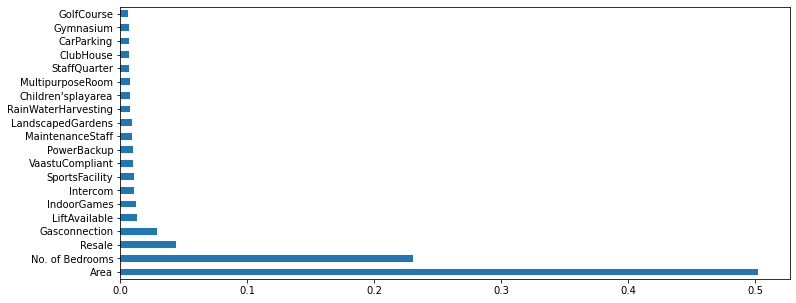

In [45]:
df2 = dfd4.drop(['Price','Location','price_per_sqft','City'], axis='columns')

label = dfd4['Price']
dfd4.drop('Price', inplace=True, axis='columns')

print(df2.shape, label.shape)

plt.figure(figsize=(12,5))
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(df2, label)
feature_importance = pd.Series(etr.feature_importances_, index=df2.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

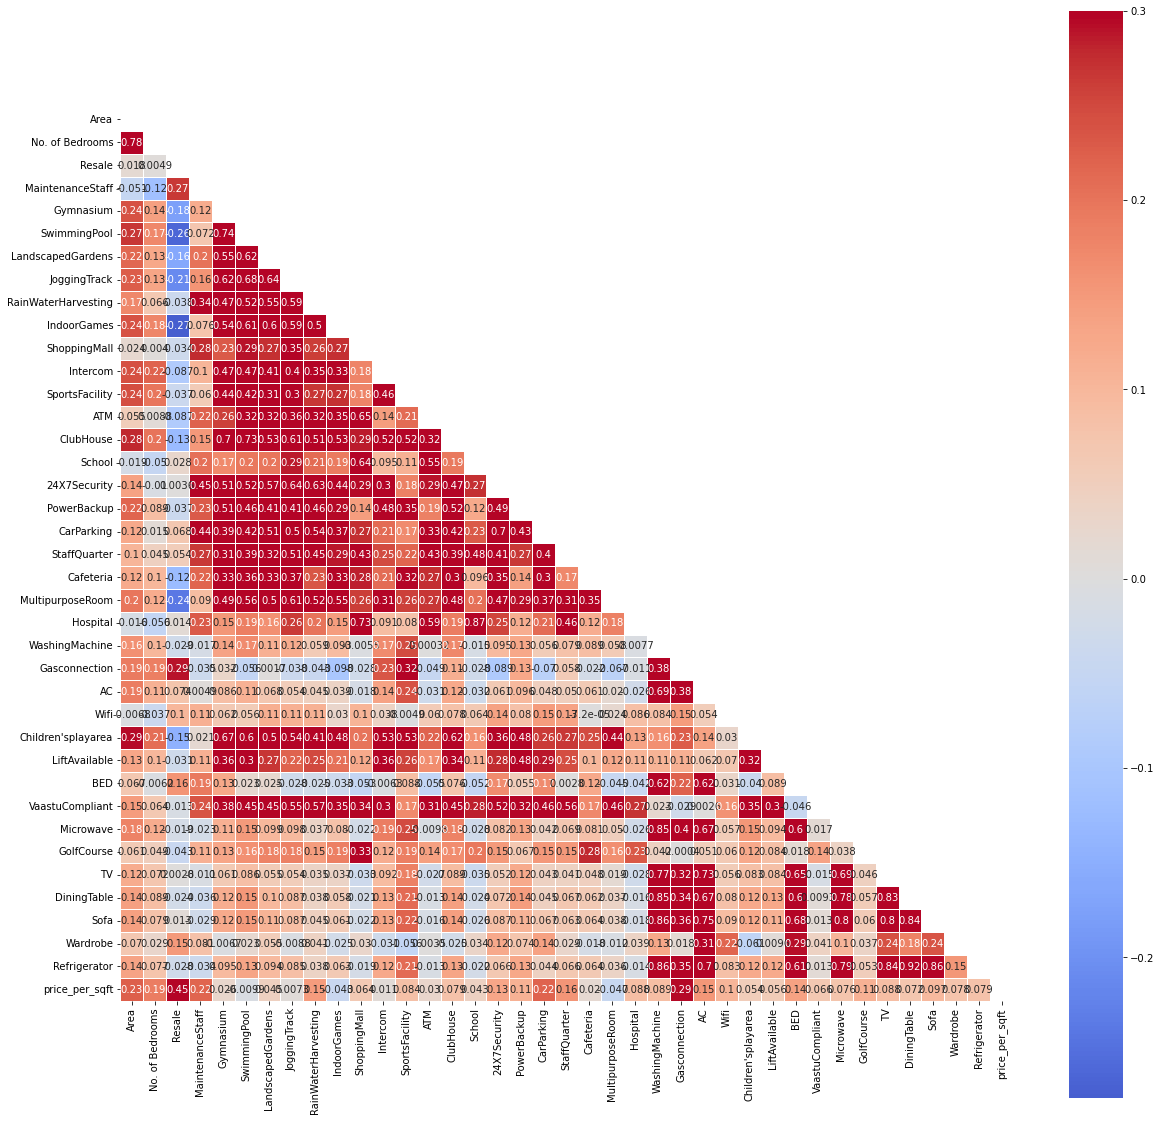

In [46]:
import numpy as np
import seaborn as sn
plt.figure(figsize=(20,20))
corr=dfd4.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sn.heatmap(dfd4.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [47]:
dfd4=pd.get_dummies(dfd4)

In [48]:
dfd4.head()

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,Location_Uttarahalli,Location_Vadapalani,Location_Varthur,Location_Vasant Kunj,Location_West Marredpally,Location_Whitefield Hope Farm Junction,Location_Yelahanka,Location_nawada,Location_other,Location_tambaram west
0,1200,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1300,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1450,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1450,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1200,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


features = ['Resale','SwimmingPool','LandscapedGardens','IndoorGames','PowerBackup','LiftAvailable','MaintenanceStaff', 'CarParking', 'Intercom',
            'Gymnasium', 'JoggingTrack', 'RainWaterHarvesting', 
            'ShoppingMall', 'SportsFacility', 'ATM', 'ClubHouse', 'School', 
            '24X7Security', 'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 
            'Hospital', 'WashingMachine', 'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 
            'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable', 
            'Sofa', 'Wardrobe', 'Refrigerator','price_per_sqft']

In [49]:
features = ['SwimmingPool','LandscapedGardens',
            'MaintenanceStaff', 'CarParking', 'Gymnasium', 'JoggingTrack', 'RainWaterHarvesting',
            'ShoppingMall','ATM', 'ClubHouse', 'School', '24X7Security', 'StaffQuarter',
            'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine','AC', 'Wifi',
            "Children'splayarea", 'BED','Microwave', 'GolfCourse', 'TV', 'DiningTable',
            'Sofa', 'Wardrobe', 'Refrigerator']

In [50]:
dfd4.drop(dfd4[features],axis='columns',inplace=True)

In [51]:
dfd4.head()

,Area,No. of Bedrooms,Resale,IndoorGames,Intercom,SportsFacility,PowerBackup,Gasconnection,LiftAvailable,VaastuCompliant,...,Location_Uttarahalli,Location_Vadapalani,Location_Varthur,Location_Vasant Kunj,Location_West Marredpally,Location_Whitefield Hope Farm Junction,Location_Yelahanka,Location_nawada,Location_other,Location_tambaram west
0,1200,3.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1300,2.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1450,3.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1450,3.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1200,2.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
dfd4.describe()

,Area,No. of Bedrooms,Resale,IndoorGames,Intercom,SportsFacility,PowerBackup,Gasconnection,LiftAvailable,VaastuCompliant,...,Location_Uttarahalli,Location_Vadapalani,Location_Varthur,Location_Vasant Kunj,Location_West Marredpally,Location_Whitefield Hope Farm Junction,Location_Yelahanka,Location_nawada,Location_other,Location_tambaram west
count,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,...,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000
mean,1368.334282,2.371977,0.368421,0.292793,0.486724,0.294452,0.692034,0.222143,0.718824,0.313419,...,0.003082,0.003556,0.004030,0.013039,0.002371,0.006401,0.003319,0.000948,0.222854,0.004030
std,710.309385,0.802735,0.482434,0.455098,0.499883,0.455850,0.461707,0.415736,0.449626,0.463938,...,0.055437,0.059535,0.063364,0.113457,0.048639,0.079760,0.057523,0.030784,0.416211,0.063364
min,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1224.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1650.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8500.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
X=dfd4.copy()

In [54]:
X.shape

(4218, 178)

In [55]:
y=label.copy()

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [57]:
from sklearn.linear_model import LinearRegression
le=LinearRegression(n_jobs=10)

In [58]:
le.fit(X_train,y_train)

LinearRegression(n_jobs=10)

In [59]:
le.score(X_test,y_test)

0.9527847217920576

In [60]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)


In [61]:
clf.fit(X_train,y_train)

Ridge()

In [62]:
clf.score(X_test,y_test)

0.9528502377304542

In [63]:
from sklearn.linear_model import Lasso

In [64]:
lass=Lasso(alpha=1.0)

In [65]:
lass.fit(X_train,y_train)

C:\Users\19056\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587728307758466.0, tolerance: 22127534506644.88
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [66]:
lass.score(X_test,y_test)

0.9527853627748091

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [68]:
rs=RandomForestClassifier(n_estimators=50)

In [69]:
rs.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [70]:
rs.score(X_test,y_test)

0.11255924170616113

In [71]:
sc=SVC()

In [72]:
sc.fit(X_train,y_train)

SVC()

In [73]:
sc.score(X_test,y_test)

0.023696682464454975

In [74]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors=50)

In [75]:
KNR.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=50)

In [76]:
KNR.score(X_test,y_test)

0.9010969532046541

In [77]:
model_params={'svm':{'model':SVC(gamma='auto'),
                    'params':{'C':[1,10],
                             'kernel':['rbf','linear']}
                    },
             'random_forest':{'model':RandomForestClassifier(),
                             'params':{'n_estimators':[1,5]}
                             },
             'logistic_regression':{'model':LogisticRegression(),
                                   'params':{'C':[1,5,10]}
                                   },
             'gaussian':{'model':GaussianNB(),
                        'params':{}
                        },
             'multinomial':{'model':MultinomialNB(),
                        'params':{}
                           }
             }

In [78]:
X.columns

Index(['Area', 'No. of Bedrooms', 'Resale', 'IndoorGames', 'Intercom',
       'SportsFacility', 'PowerBackup', 'Gasconnection', 'LiftAvailable',
       'VaastuCompliant',
       ...
       'Location_Uttarahalli', 'Location_Vadapalani', 'Location_Varthur',
       'Location_Vasant Kunj', 'Location_West Marredpally',
       'Location_Whitefield Hope Farm Junction', 'Location_Yelahanka',
       'Location_nawada', 'Location_other', 'Location_tambaram west'],
      dtype='object', length=178)

In [79]:
np.where(X.columns=='Location_Uttarahalli')[0][0]

168

scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=2,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({'model':model_name,
                   'best_score':clf.best_score_,
                  'best_params':clf.best_params_})

In [80]:
import numpy as np
def price_predict(location,area,bed,resale,indoor,intercom,sports,power,gas,lift,vastu):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    
    x[0]=area
    x[1]=bed
    x[2]=resale
    x[3]=indoor
    x[4]=intercom
    x[5]=sports
    x[6]=power
    x[7]=gas
    x[8]=lift
    x[9]=vastu
    
    if loc_index>=0:
        x[loc_index]=1
    return le.predict([x])[0]
    

In [81]:
price_predict('Location_Uttarahalli',1300,0,0,0,0,0,0,0,0,0)

1473951.7129203975

In [82]:
import pickle
with open('final.pickle','wb') as f:
    pickle.dump(le,f)

In [83]:
import json
columns={'data_columns':[col.lower()for col in X.columns]}
with open("column.json","w") as f:
    f.write(json.dumps(columns))